# import library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the data set
data=pd.read_csv('C:/Users/SANKEETH/Downloads/housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
# shape of the dataset
data.shape

(20640, 10)

In [4]:
#in this step of preprocessing is to find null values 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
#filling the null values with mean for the particular row
data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [6]:
#describeing the dataframe
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#find the data types 
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [8]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# label encoding

In [9]:
#next step is to convert the string values into numerical values
#labelencodeing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])
data['ocean_proximity'].head()

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64

# one hot encodeing

In [10]:
#OneHotEncodeing
dummy=pd.get_dummies(data['ocean_proximity'])
data=pd.concat([data,dummy],axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,0,1,2,3,4
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200,0,0,0,1,0


In [11]:
#next step is standardization
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(data) 
rescaledX = scaler.transform(data) 
np.set_printoptions(precision=3) 
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,0,1,2,3,4
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200,0,0,0,1,0


In [12]:
#ploting the graphs to find the relations


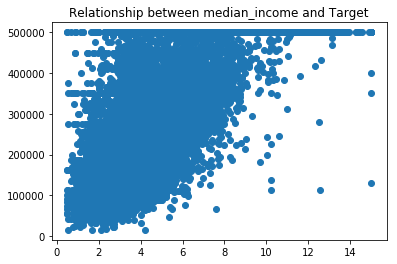

In [13]:
plt.scatter(data.median_income,data.median_house_value)
plt.title("Relationship between median_income and Target")
plt.show()

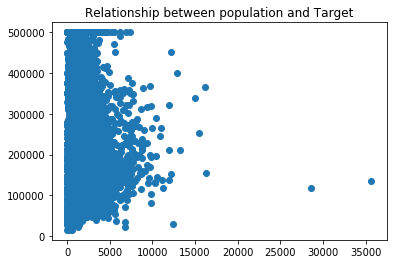

In [14]:
plt.scatter(data.population,data.median_house_value)
plt.title("Relationship between population and Target")
plt.show()

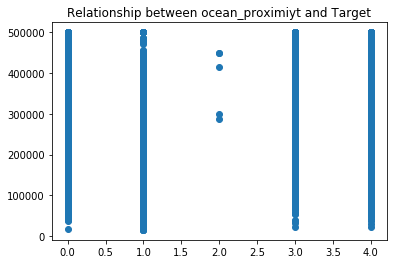

In [15]:
plt.scatter(data.ocean_proximity,data.median_house_value)
plt.title("Relationship between ocean_proximiyt and Target")
plt.show()

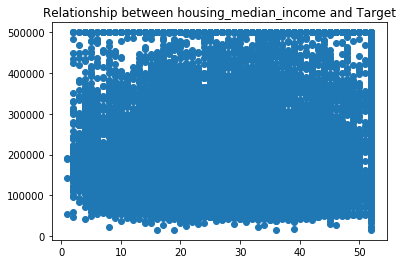

In [16]:
plt.scatter(data.housing_median_age,data.median_house_value)
plt.title("Relationship between housing_median_income and Target")
plt.show()

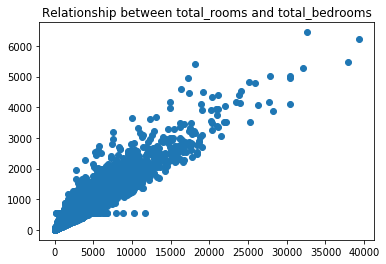

In [17]:
plt.scatter(data.total_rooms,data.total_bedrooms)
plt.title("Relationship between total_rooms and total_bedrooms")
plt.show()

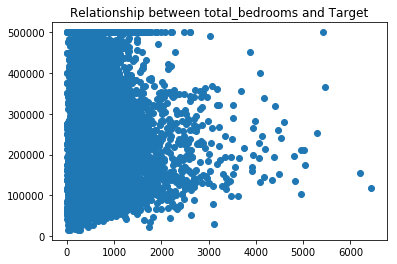

In [18]:
plt.scatter(data.total_bedrooms,data.median_house_value)
plt.title("Relationship between total_bedrooms and Target")
plt.show()

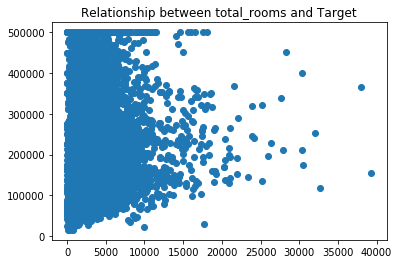

In [19]:
plt.scatter(data.total_rooms,data.median_house_value)
plt.title("Relationship between total_rooms and Target")
plt.show()

# histogram analysis 

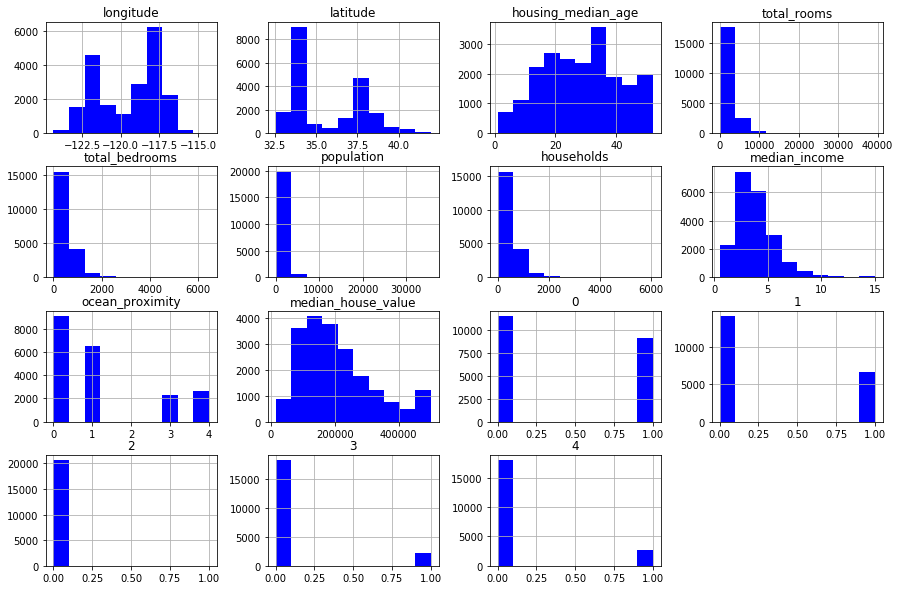

In [20]:
data.hist(figsize=(15,10), color = 'blue')
plt.show()

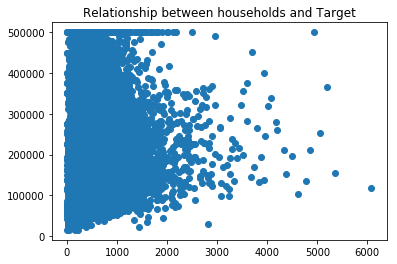

In [21]:
plt.scatter(data.households,data.median_house_value)
plt.title("Relationship between households and Target")
plt.show()

In [22]:
#spliting the data identifying dependent and independent variables
x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [23]:
#spliting into test and train
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.2,random_state=42)


# perform linear regression

In [ ]:

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(xtrain, ytrain)
predictions = lin.predict(xtest)
accuracy = lin.score(xtest,ytest)
accu=(accuracy*100,'%')
print("accuracy :"+str(accu))

In [ ]:
#to print rmse value
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest,predictions))
print("root mean square error: "+str(rms))

# using decision tree

In [ ]:

from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(max_depth=19,min_samples_leaf = 7,max_features = 'sqrt',random_state= 42,min_samples_split = 5)
dtree_reg.fit(xtrain, ytrain)
pred = dtree_reg.predict(xtest)
acc= dtree_reg.score(xtest,ytest)
print("Accuracy:")
print(acc*100,'%')
print("Error:")
print(sqrt(mean_squared_error(ytest, pred)))

# Predicting the values randomforest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=24, random_state=2,n_estimators=750,max_features = 'sqrt')
regr.fit(xtrain, ytrain) 
y_pred = regr.predict(xtest)
p = mean_squared_error(ytest, y_pred)
print(p ** 0.5)
acc= regr.score(xtest,ytest)
print("Accuracy:")
print(acc*100,'%')

# linear regression using single feature to predict the output

In [ ]:
from sklearn.cross_validation import train_test_split
xs= data.iloc[:, 7].values
ys =data.iloc[:, 9].values
#Spliting the dataset into Training set and Test Set
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size= 0.05, random_state=3)
#linnear Regression
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test,y_pred))
print("root mean square error: "+str(rms))
accuracy = regressor.score(x_test,y_test)
accu=(accuracy*100,'%')
print("accuracy :"+str(accu))

In [ ]:
#linear regression graph 
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()


In [ ]:
#graph between actual and predicted median_house_value
fig = plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,marker="*",s=100)
plt.scatter(y_train,regressor.predict(x_train),marker="s",s=7,alpha=0.8)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")